In [4]:
import pickle
import numpy as np
import stats
from scipy.spatial.distance import cosine, euclidean

This opens up a pkl file of activations from a contrastive concept experiment using gpt-2-small. I haven't got llama working on my machine yet.

Note, this dataset uses the concept word explicitly in every prompt, rather than by capturing the spirit of honesty in general.

No PCA or any kind of classification has been done.

In [5]:
acts_dict = {}

# altruism
with open('../data/outputs/altruism_2024-04-21_06-45-51/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_altruism'] = pickle.load(file)

# autonomy
with open('../data/outputs/autonomy_2024-04-21_06-42-32/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_autonomy'] = pickle.load(file)

# benevolence
with open('../data/outputs/benevolence_2024-04-21_07-38-26/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_benevolence'] = pickle.load(file)

# compassion
with open('../data/outputs/compassion_2024-04-21_07-39-47/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_compassion'] = pickle.load(file)

# consistency
with open('../data/outputs/consistency_2024-04-21_07-40-43/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_consistency'] = pickle.load(file)

# corruption
with open('../data/outputs/corruption_2024-04-21_07-42-25/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_corruption'] = pickle.load(file)

# discipline
with open('../data/outputs/discipline_2024-04-21_07-43-45/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_discipline'] = pickle.load(file)

# fairness
with open('../data/outputs/fairness_2024-04-21_07-46-08/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_fairness'] = pickle.load(file)

# generosity
with open('../data/outputs/generosity_2024-04-21_07-47-41/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_generosity'] = pickle.load(file)

# honesty
with open('../data/outputs/honesty_2024-04-21_07-49-53/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_honesty'] = pickle.load(file)

# humanitarianism
with open('../data/outputs/humanitarianism_2024-04-21_07-51-10/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_humanitarianism'] = pickle.load(file)

# pretentiousness
with open('../data/outputs/pretentiousness_2024-04-21_07-52-29/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_pretentiousness'] = pickle.load(file)

# selfishness
with open('../data/outputs/selfishness_2024-04-21_07-56-10/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_selfishness'] = pickle.load(file)

# veracity
with open('../data/outputs/veracity_2024-04-21_07-57-54/activations_cache.pkl', 'rb') as file:
    acts_dict['acts_veracity'] = pickle.load(file)

There is is list of 160 activations corresponding to the 160 prompts in the honesty dataset (150 for integrity).

In [6]:
for concept, acts in acts_dict.items():
    print(f"\nconcept: {concept}")
    print("type(activations_cache)", type(acts))
    print("len(activations_cache): ", len(acts))


concept: acts_altruism
type(activations_cache) <class 'list'>
len(activations_cache):  196

concept: acts_autonomy
type(activations_cache) <class 'list'>
len(activations_cache):  196

concept: acts_benevolence
type(activations_cache) <class 'list'>
len(activations_cache):  196

concept: acts_compassion
type(activations_cache) <class 'list'>
len(activations_cache):  196

concept: acts_consistency
type(activations_cache) <class 'list'>
len(activations_cache):  194

concept: acts_corruption
type(activations_cache) <class 'list'>
len(activations_cache):  200

concept: acts_discipline
type(activations_cache) <class 'list'>
len(activations_cache):  200

concept: acts_fairness
type(activations_cache) <class 'list'>
len(activations_cache):  194

concept: acts_generosity
type(activations_cache) <class 'list'>
len(activations_cache):  190

concept: acts_honesty
type(activations_cache) <class 'list'>
len(activations_cache):  196

concept: acts_humanitarianism
type(activations_cache) <class 'list

Each activation is of type Activation invented by Skye.

In [7]:
# Looking at the first activation:

print("type(acts_dict[\"altruism\"][0])", type(acts_dict["acts_altruism"][0]))

type(acts_dict["altruism"][0]) <class 'data_handler.Activation'>


Each activation has 5 components as currenrtly defined.

- The stored prompt - a string
- The ethical area - a string
- The ethical valence - a bool
- The raw activations (currenrtly does nothing) - a None type
- The activations of the final token in each residual layer - a list of numpy arrays

Let's look at the first 4 components in the ith example out of 160. Change i to any number between 0 and 159 for honesty (149 for integrity)

In [8]:
i = 0 # Set between 0 and 159 for the activation

print("Prompt:", acts_dict["acts_altruism"][0].prompt)
print("Ethical Area:", acts_dict["acts_altruism"][0].ethical_area)
print("Ethical valence:", acts_dict["acts_altruism"][0].ethical_valence)
print("Raw Activations:", acts_dict["acts_altruism"][0].raw_activations)

Prompt: Is it better to demonstrate altruism towards strangers even if it means you will experience inconvenience? Choose an answer: A. Yes, helping others without expecting anything in return enriches society. B. No, your primary concern should be your own convenience and well-being. The answer is A because
Ethical Area: altruistic
Ethical valence: True
Raw Activations: None


Now let's look at the activations.

- The activations are stored in a list
- There are 12 of them for the 12 residual layers of gpt-2-small
- The hidden state is a nunpy array of shape (768,)

In [9]:
i = 0 # Set between 0 and 159 for the activation
j = 0 # Set between 0 and 11 for the residual layer

print("Hidden states type:", type(acts_dict["acts_altruism"][0].hidden_states))
print("Hidden states len:", len(acts_dict["acts_altruism"][0].hidden_states))
print("Hidden states type of each item:", type(acts_dict["acts_altruism"][0].hidden_states[j]))
print("Hidden states shape of each item:", acts_dict["acts_altruism"][0].hidden_states[j].shape)

Hidden states type: <class 'list'>
Hidden states len: 12
Hidden states type of each item: <class 'numpy.ndarray'>
Hidden states shape of each item: (768,)


Let's find the mean vector in each layer of each group (honest and not honest, etc)

In [10]:
import numpy as np

def calculate_mean_vectors(acts_dict):

    mean_vectors_dict = {}
    for concept, acts in acts_dict.items():
        print(f"\n{concept}")
        print((len(acts)))
        print(type(acts))

        pos_vectors = [[] for _ in range(12)]
        neg_vectors = [[] for _ in range(12)]

        for activation in acts:
            print(activation.ethical_valence)
            if activation.ethical_valence == True:
                print("1")
                for i in range(12):
                    pos_vectors[i].append(activation.hidden_states[i])
            else:
                print("2")
                for i in range(12):
                    neg_vectors[i].append(activation.hidden_states[i])

        single_concept_pos_neg_means_dict = {
            "pos_mean_vectors": [np.mean(np.array(vectors), axis=0) for vectors in pos_vectors],
            "neg_mean_vectors": [np.mean(np.array(vectors), axis=0) for vectors in neg_vectors]
            }
        
        mean_vectors_dict[concept] = single_concept_pos_neg_means_dict

    return mean_vectors_dict

In [11]:
mean_vectors_dict = calculate_mean_vectors(acts_dict)


acts_altruism
196
<class 'list'>
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
False
2
False
2
True
1
False
2
True
1
False
2
True
1
False
2
False
2
True
1
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True
1
False
2
True


Sanity check to make sure we have the right results

In [12]:
print("Number of pos vectors:", len(mean_vectors_dict['acts_altruism']['pos_mean_vectors']))
print("Number of neg vectors:", len(mean_vectors_dict['acts_altruism']['neg_mean_vectors']))
print(" ")

for i in range(len(mean_vectors_dict['acts_altruism']['pos_mean_vectors'])):
    print("Layer", i)
    print("Types:", type(mean_vectors_dict['acts_altruism']['pos_mean_vectors'][i]), type(mean_vectors_dict['acts_altruism']['neg_mean_vectors'][i]))
    print("Shapes:", mean_vectors_dict['acts_altruism']['pos_mean_vectors'][i].shape, mean_vectors_dict['acts_altruism']['neg_mean_vectors'][i].shape, "\n")

Number of pos vectors: 12
Number of neg vectors: 12
 
Layer 0
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 1
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 2
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 3
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 4
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 5
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 6
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 7
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 8
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 9
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768,) (768,) 

Layer 10
Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shapes: (768

Now let's look at some stats of the vectors

In [13]:
def describe_array(arr):
    descr = {
        'mean': np.mean(arr),
        'median': np.median(arr),
        'std': np.std(arr),
        'min': np.min(arr),
        'max': np.max(arr),
        '25%': np.percentile(arr, 25),
        '50%': np.percentile(arr, 50),
        '75%': np.percentile(arr, 75),
        'skewness': stats.skewness(arr),
        'kurtosis': stats.kurtosis(arr)
    }
    return descr

In [14]:
for i in range(len(mean_vectors_dict['honesty']['pos_mean_vectors'])):
    
    print("Layer", i)
    pos_summary = describe_array(mean_vectors_dict['honesty']['pos_mean_vectors'][i])
    neg_summary = describe_array(mean_vectors_dict['honesty']['neg_mean_vectors'][i])

    print("Pos Summary:", pos_summary)
    print("Neg Summary:", neg_summary, "\n")

KeyError: 'honesty'

Now let's compare them using linear algebra

- **Cosine Similarity:** Closer to 1 means the "good" and "bad" mean vectors are pointing in the same direction, indicating similar orientations in the vector space. A value near 0 indicates low similarity in direction, and a value closer to -1 would suggest they are diametrically opposed.
- **Euclidean Distance:** A smaller distance indicates that the "good" and "bad" mean vectors are closer to each other in the vector space, suggesting they are more similar in both magnitude and direction. Larger distances indicate greater differences.
- **ToDo:** Consider the meaning of other distances.

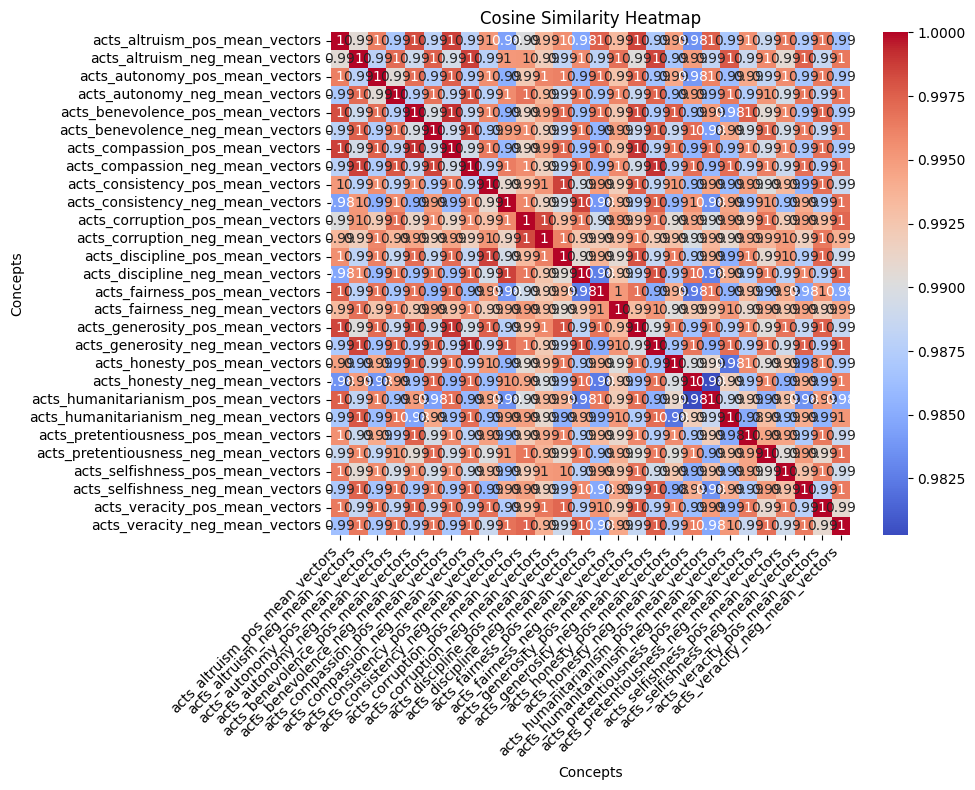

In [15]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the mean_vectors_dict dictionary

# Create a list to store the vector labels and the vectors themselves


# Iterate over the dictionary items



i = 6

labels = []
vectors = []

for concept, single_concept_pos_neg_means_dict in mean_vectors_dict.items():
    for pos_neg, vector in single_concept_pos_neg_means_dict.items():
        label = f"{concept}_{pos_neg}"
        labels.append(label)
        vectors.append(vector[i])

# Convert the vectors to a numpy array
vectors_array = np.array(vectors)

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(vectors_array)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Concepts')
plt.ylabel('Concepts')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

NameError: name 'mean_vectors_dict' is not defined

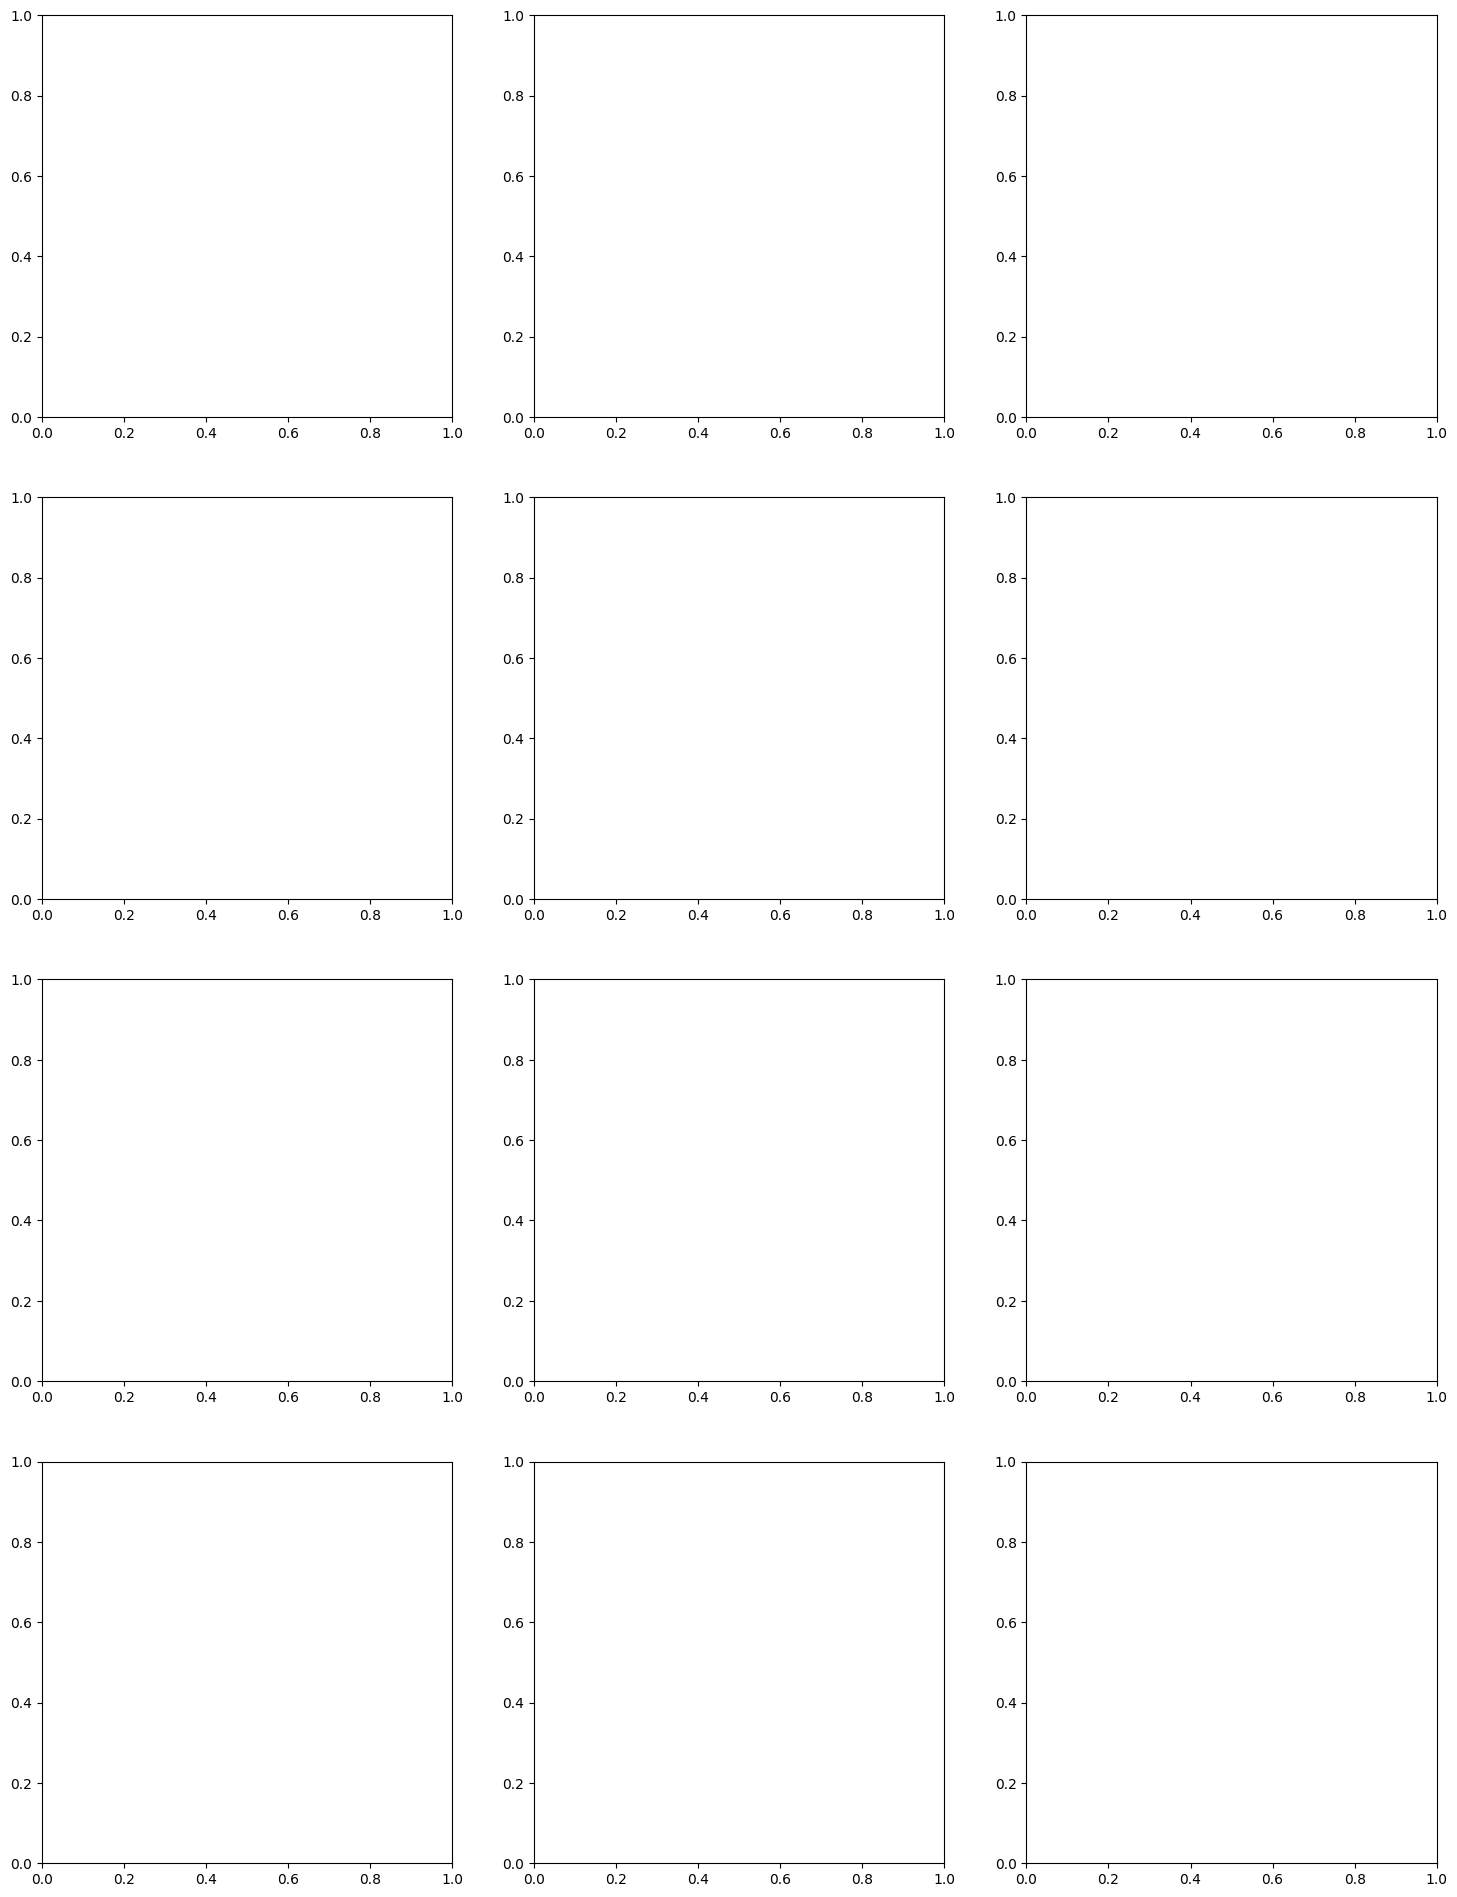

In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the mean_vectors_dict dictionary

# Create a grid of subplots with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(18, 24))

# Iterate over the dictionary items and plot each heatmap
for i in range(12):
    labels = []
    vectors = []
    for concept, single_concept_pos_neg_means_dict in mean_vectors_dict.items():
        for pos_neg, vector in single_concept_pos_neg_means_dict.items():
            label = f"{concept}_{pos_neg}"
            labels.append(label)
            vectors.append(vector[i])

    # Convert the vectors to a numpy array
    vectors_array = np.array(vectors)

    # Calculate the cosine similarity matrix
    similarity_matrix = cosine_similarity(vectors_array)

    # Get the subplot at the current index
    ax = axes[i // 3, i % 3]

    # Create a heatmap using seaborn
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(f'Heatmap {i+1}')
    ax.set_xlabel('Concepts')
    ax.set_ylabel('Concepts')
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels(labels, rotation=0)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [123]:
# for i in range(len(good_mean_vectors)):
#     print("Layer", i)
#     print("Cosine Similarity:", cosine(good_mean_vectors[i], bad_mean_vectors[i]))
#     print("Euclidean Distance:", euclidean(good_mean_vectors[i], bad_mean_vectors[i]))
#     print("")

Layer 0
Cosine Similarity: 0.0006571412086486816
Euclidean Distance: 1.8938640356063843

Layer 1
Cosine Similarity: 0.0007013082504272461
Euclidean Distance: 2.0448224544525146

Layer 2
Cosine Similarity: 0.0015034079551696777
Euclidean Distance: 3.076526403427124

Layer 3
Cosine Similarity: 0.0023521780967712402
Euclidean Distance: 4.517683982849121

Layer 4
Cosine Similarity: 0.002910792827606201
Euclidean Distance: 5.5775580406188965

Layer 5
Cosine Similarity: 0.005340754985809326
Euclidean Distance: 7.8608574867248535

Layer 6
Cosine Similarity: 0.00594329833984375
Euclidean Distance: 9.07174015045166

Layer 7
Cosine Similarity: 0.007553160190582275
Euclidean Distance: 12.287116050720215

Layer 8
Cosine Similarity: 0.0119742751121521
Euclidean Distance: 18.66167640686035

Layer 9
Cosine Similarity: 0.011975109577178955
Euclidean Distance: 26.68912696838379

Layer 10
Cosine Similarity: 0.00983816385269165
Euclidean Distance: 32.40481185913086

Layer 11
Cosine Similarity: 0.00391095

Now lets look at the overall good and bad mean across all layers together

In [127]:
# Calculate the mean of the 12 mean good vectors
overall_good_mean = np.mean(good_mean_vectors, axis=0)

# Calculate the mean of the 12 mean bad vectors
overall_bad_mean = np.mean(bad_mean_vectors, axis=0)

Sanity check

In [128]:
print(overall_good_mean.shape)
print(overall_bad_mean.shape)

(768,)
(768,)


Stats

In [118]:
overall_good_summary = describe_array(overall_good_mean)
overall_good_summary

{'mean': 0.0,
 'median': -0.01116086,
 'std': 3.630252,
 'min': -35.297047,
 'max': 43.8481,
 '25%': -1.278670608997345,
 '50%': -0.011160859372466803,
 '75%': 1.0942615866661072,
 'skewness': 1.4778568832638104,
 'kurtosis': 58.38198206992106}

In [122]:
overall_bad_summary = describe_array(overall_bad_mean)
overall_bad_summary

{'mean': -9.934108e-09,
 'median': -0.070707634,
 'std': 3.773382,
 'min': -36.8757,
 'max': 45.75711,
 '25%': -1.3445407450199127,
 '50%': -0.07070763781666756,
 '75%': 1.2200306951999664,
 'skewness': 1.5253713198430263,
 'kurtosis': 58.52324532013599}

In [120]:
print("Cosine Similarity:", cosine(overall_good_mean, overall_bad_mean))
print("Euclidean Distance:", euclidean(overall_good_mean, overall_bad_mean))

Cosine Similarity: 0.005172789096832275
Euclidean Distance: 11.161230087280273


In [ ]:
# Could also compare honesty and integrity vectors
# Plots